# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости результатов")

Для воспроизводимости результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(n=10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
display(df_test.head(), df_test.tail())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
desc_train_num, desc_test_num = df_train.describe(), df_test.describe()
pd.DataFrame(
    np.column_stack([desc_train_num, desc_test_num]),
    columns=pd.MultiIndex.from_product([['Основные статистики числовых признаков'], ['Train', 'Test'], desc_train_num.columns]),
    index=desc_train_num.index
).stack(level=1).round()

Основные статистики числовых признаков                           \
                                              year selling_price  km_driven   
count Test                                  1000.0        1000.0     1000.0   
      Train                                 6999.0        6999.0     6999.0   
mean  Test                                  2014.0      617901.0    71393.0   
      Train                                 2014.0      639515.0    69585.0   
std   Test                                     4.0      758554.0    48486.0   
      Train                                    4.0      808942.0    57724.0   
min   Test                                  1995.0       31000.0     1303.0   
      Train                                 1983.0       29999.0        1.0   
25%   Test                                  2011.0      250000.0    37000.0   
      Train                                 2011.0      254999.0    35000.0   
50%   Test                                  2014.0      434999.0    61500.0   
      Train                                 2015.0      450000.0    60000.0   
75%   Test                                  2017.0      670000.0   100000.0   
      Train                                 2017.0      675000.0    97000.0   
max   Test                                  2020.0     6000000.0   375000.0   
      Train                                 2020.0    10000000.0  2360457.0   

                     
              seats  
count Test    981.0  
      Train  6797.0  
mean  Test      5.0  
      Train     5.0  
std   Test      1.0  
      Train     1.0  
min   Test      4.0  
      Train     2.0  
25%   Test      5.0  
      Train     5.0  
50%   Test      5.0  
      Train     5.0  
75%   Test      5.0  
      Train     5.0  
max   Test      9.0  
      Train    14.0

In [7]:
desc_train_cat, desc_test_cat = df_train.describe(include='object'), df_test.describe(include='object')
pd.DataFrame(
    np.column_stack([desc_train_cat, desc_test_cat]),
    columns=pd.MultiIndex.from_product([['Основные статистики категориальных признаков'], ['Train', 'Test'], desc_train_cat.columns]),
    index=desc_train_cat.index
).stack(level=1)

Основные статистики категориальных признаков                      \
                                                     name    fuel seller_type   
count  Test                                          1000    1000        1000   
       Train                                         6999    6999        6999   
unique Test                                           621       4           3   
       Train                                         1924       4           3   
top    Test                           Maruti Alto 800 LXI  Diesel  Individual   
       Train                       Maruti Swift Dzire VDI  Diesel  Individual   
freq   Test                                            15     534         837   
       Train                                          116    3793        5826   

                                                                      \
             transmission        owner    mileage   engine max_power   
count  Test          1000         1000        981      981       981   
       Train         6999         6999       6797     6797      6803   
unique Test             2            5        237       88       182   
       Train            2            5        386      120       316   
top    Test        Manual  First Owner  18.6 kmpl  1248 CC    74 bhp   
       Train       Manual  First Owner  18.9 kmpl  1248 CC    74 bhp   
freq   Test           877          623         23      116        43   
       Train         6095         4587        197      885       330   

                              
                      torque  
count  Test              981  
       Train            6796  
unique Test              226  
       Train             419  
top    Test   200Nm@ 1750rpm  
       Train  190Nm@ 2000rpm  
freq   Test               57  
       Train             468

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
cnt_passes = pd.DataFrame(
                    np.column_stack([df_train.isnull().sum(), df_test.isnull().sum()]),
                    columns=pd.MultiIndex.from_product([['Наличие пропусков по столбцам'], ['Train', 'Test']]),
                    index=df_train.columns
            )
display(cnt_passes)
print(f'Пропуски имеются в следующих колонках:\n{cnt_passes.index[~cnt_passes.eq(0).all(axis=1)].tolist()}')

Наличие пропусков по столбцам     
                                      Train Test
name                                      0    0
year                                      0    0
selling_price                             0    0
km_driven                                 0    0
fuel                                      0    0
seller_type                               0    0
transmission                              0    0
owner                                     0    0
mileage                                 202   19
engine                                  202   19
max_power                               196   19
torque                                  203   19
seats                                   202   19

Пропуски имеются в следующих колонках:
['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
features = df_train.columns.drop('selling_price')

duplicateRows = df_train[df_train.duplicated(features)]
print(f'Количество дубликатов: {len(duplicateRows)}')
print(f'Из них {len(duplicateRows.drop_duplicates())} уникальных')

Количество дубликатов: 1159
Из них 657 уникальных


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
duplicateRows.sort_values(by='name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
df_train.drop_duplicates(subset=features, keep='first', inplace=True)

In [12]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [13]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [14]:
for df in (df_train, df_test):
    df.drop(columns=['torque'], inplace=True)
    for col in ('mileage', 'engine', 'max_power'):
        df[col] = df[col].apply(lambda x: re.search(r'[0-9]*[.,]?[0-9]+', str(x)).group() 
                                if re.search(r'[0-9]*[.,]?[0-9]+', str(x)) != None 
                                else np.nan).astype(float)


df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5656 non-null   float64
 11  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [15]:
med_mil = df_train['mileage'].median()
med_eng = df_train['engine'].median()
med_pow = df_train['max_power'].median()
med_sea = df_train['seats'].median()

df_train['mileage'] = df_train['mileage'].fillna(med_mil)
df_train['engine'] = df_train['engine'].fillna(med_eng)
df_train['max_power'] = df_train['max_power'].fillna(med_pow)
df_train['seats'] = df_train['seats'].fillna(med_sea)

df_test['mileage'] = df_test['mileage'].fillna(med_mil)
df_test['engine'] = df_test['engine'].fillna(med_eng)
df_test['max_power'] = df_test['max_power'].fillna(med_pow)
df_test['seats'] = df_test['seats'].fillna(med_sea)

In [16]:
print(f'Пропусков в Train: {df_train.isna().sum().sum()}\nПропусков в Test: {df_test.isna().sum().sum()}')

Пропусков в Train: 0
Пропусков в Test: 0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [17]:
print(
f'''
Признак seats указывает на количество посадочных мест в автомобиле.
Он не влияет напрямую на стоимость авто, о чем говорит низкий коэффициент корреляции равный {df_train['seats'].corr(df_train['selling_price']):.2}.
Большее количество мест не гарантирует высокую стоимость авто, как и меньшее количество мест.
А значит 5 не больше 2, это просто разные значения признаков.
Поэтому признак seats лучше отнести к категориальным.
'''
)


Признак seats указывает на количество посадочных мест в автомобиле.
Он не влияет напрямую на стоимость авто, о чем говорит низкий коэффициент корреляции равный 0.15.
Большее количество мест не гарантирует высокую стоимость авто, как и меньшее количество мест.
А значит 5 не больше 2, это просто разные значения признаков.
Поэтому признак seats лучше отнести к категориальным.



In [18]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int32  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int32  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 502.0+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

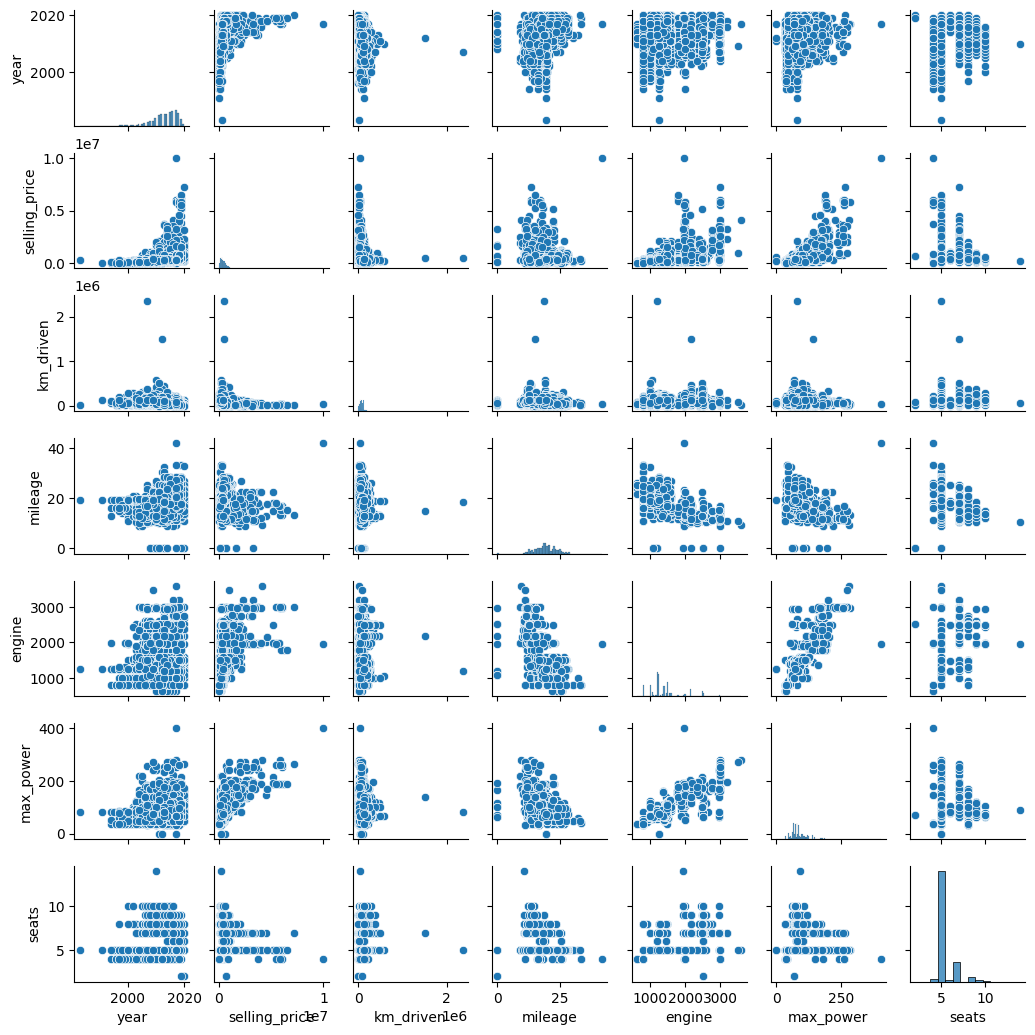

In [19]:
_ = sns.pairplot(df_train, height=1.5)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

* <font color='#32CD32'> Просматривается прямая зависимость между стоимостью авто и такими параметрами как объем двигателя и максимальная мощность. Менее очевидная зависимость стоимости авто от года и пробега, но она также наблюдается. С увеличением значений этих параметров стоимость увеличивается.
* <font color='#32CD32'> Наиболее сильная корреляция заметна между максимальной мощностью двигателя и его объемом. Также эти признаки слабее коррелируют с количеством сидений.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

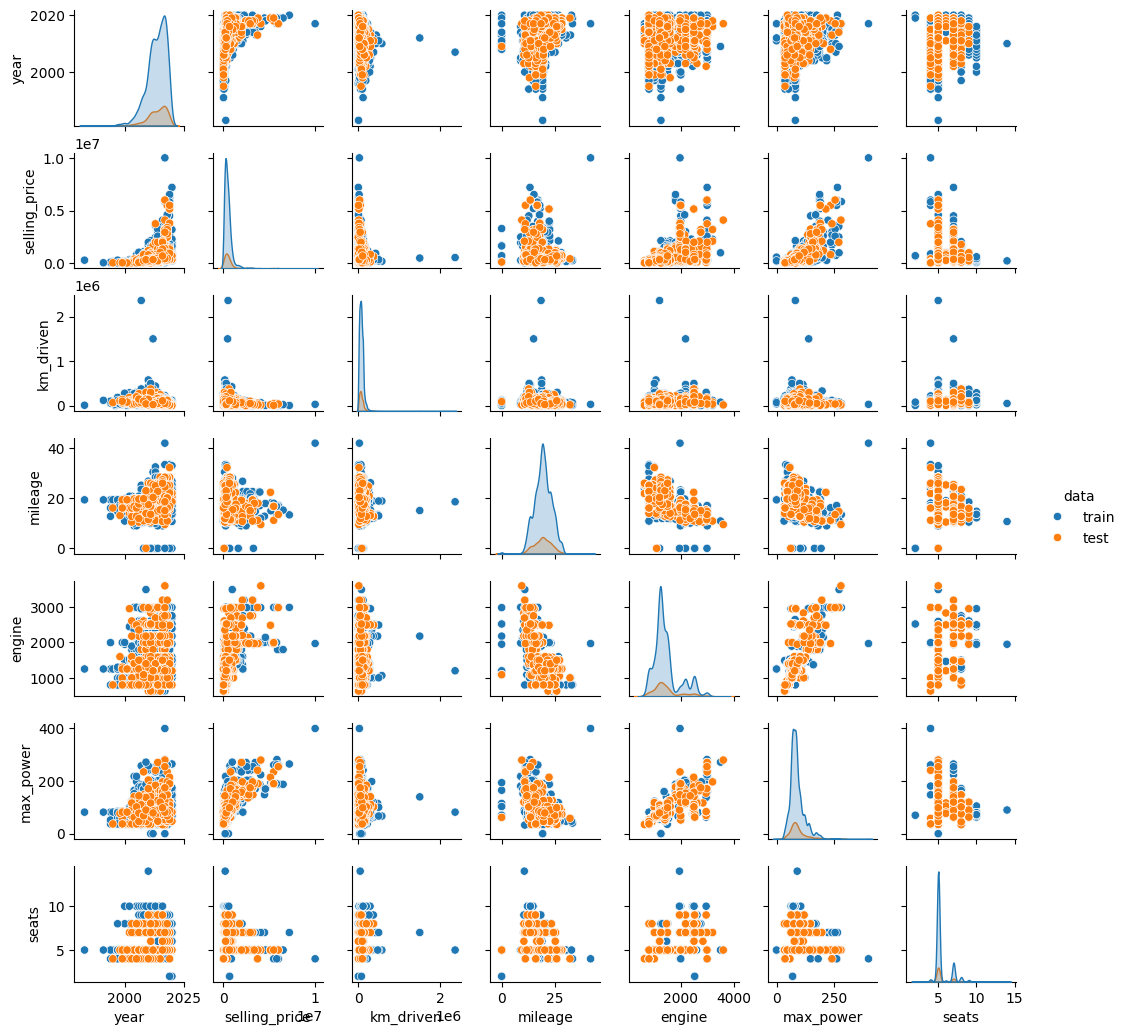

In [20]:
df_train['data'] = 'train'
df_test['data'] = 'test'

df_tt = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)
_ = sns.pairplot(df_tt, hue='data', height=1.5)

df_train.drop(columns=['data'], inplace=True)
df_test.drop(columns=['data'], inplace=True)

* <font color='#32CD32'> После разделения на train и test совокупности выглядят похожими, с отличием в том, что у тренировочной выборки заметно больше выбросов.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

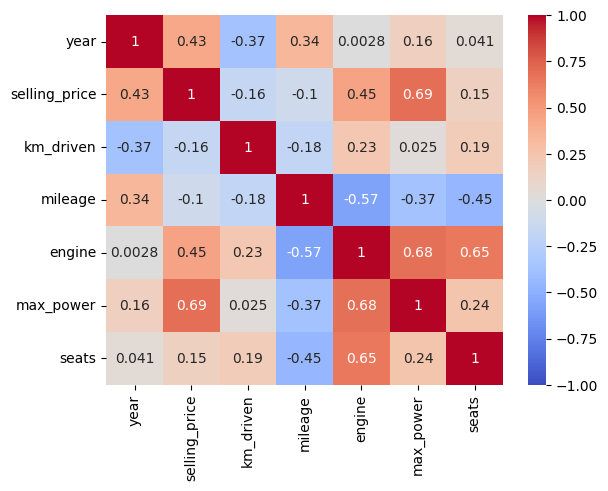

In [21]:
_ = sns.heatmap(df_train.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=+1, cmap='coolwarm')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* <font color='#32CD32'> Наименее скоррелированы между собой год и объем двигателя.
* <font color='#32CD32'> Довольно сильная положитльная линейная зависимость между признакоми engine и max_power.
* <font color='#32CD32'> Нет. Скорее до определенного года зависимость положительная и невысокая, а после стала отрицательной.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

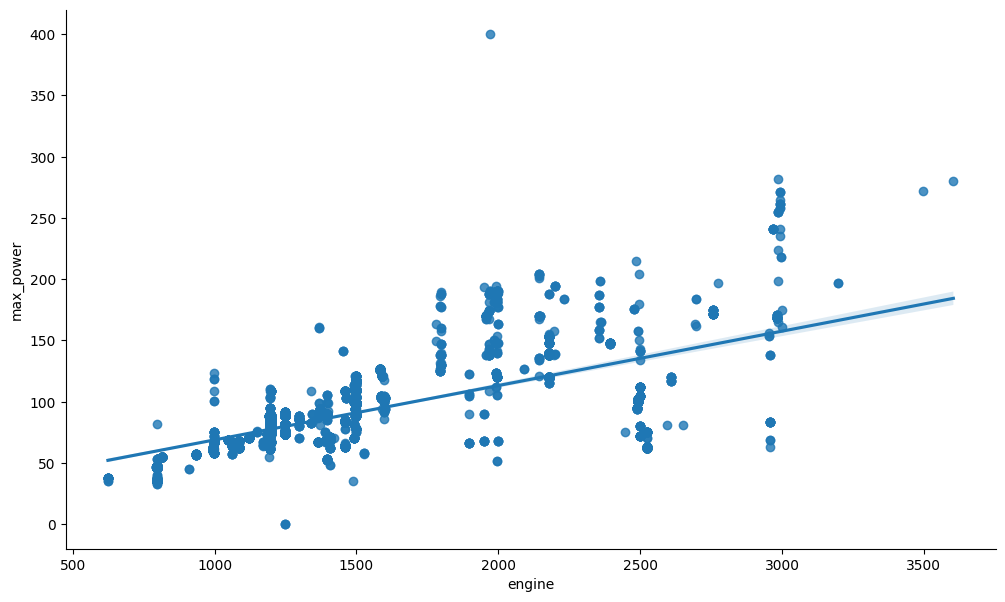

In [22]:
g = sns.regplot(data=df_train, x='engine', y='max_power')
g.figure.set_size_inches(12, 7)
sns.despine()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [23]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [24]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include=np.number).drop(columns='selling_price')

In [25]:
assert X_train.shape == (5840, 6)

In [26]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include=np.number).drop(columns='selling_price')

In [27]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def result(model, X1, y1, X2, y2):
    pred_train = model.predict(X1)
    pred_test = model.predict(X2)

    result = pd.DataFrame(data={'train': [r2_score(y1, pred_train), MSE(y1, pred_train)],
                                'test': [r2_score(y2, pred_test), MSE(y2, pred_test)]},
                          index=['R2', 'MSE'])

    print(result)


In [29]:
model_Lin = LinearRegression()
model_Lin.fit(X_train, y_train)

result(model_Lin, X_train, y_train, X_test, y_test)

            train          test
R2   5.922592e-01  5.941420e-01
MSE  1.168742e+11  2.332988e+11


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

with open('pkl_params/scaler_coefs.pkl', 'wb') as f:
    pickle.dump(scaler.coef_, f)

model_Lin = LinearRegression()
model_Lin.fit(X_train, y_train)

result(model_Lin, X_train, y_train, X_test, y_test)

            train          test
R2   5.922592e-01  5.941420e-01
MSE  1.168742e+11  2.332988e+11


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [31]:
pd.DataFrame(data={'weights': model_Lin.coef_},
             index=X_train.columns).sort_values(by='weights')

,weights
km_driven,-44158.818520
seats,-23209.132486
mileage,28833.925778
engine,61178.494337
year,152772.570846
max_power,322807.353259


* <font color='#32CD32'> Наиболее информативный в предсказании цены признак "max_power".

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [32]:
from sklearn.linear_model import Lasso

model_L = Lasso(random_state=42)
model_L.fit(X_train, y_train)

pred_L_train = model_L.predict(X_train)
pred_L_test = model_L.predict(X_test)

result(model_L, X_train, y_train, X_test, y_test)

            train          test
R2   5.922592e-01  5.941408e-01
MSE  1.168742e+11  2.332995e+11


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [33]:
pd.DataFrame(data={'weights': model_L.coef_},
             index=X_train.columns).sort_values(by='weights')

,weights
km_driven,-44157.689858
seats,-23206.255649
mileage,28832.043396
engine,61173.662409
year,152772.390214
max_power,322808.236919


* <font color='#32CD32'> L1-регуляризация с параметрами по умолчанию не занулила ни один вес, так как параметр alpha по умолчанию равен 1 и видимо не является корректным для текущей задачи.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [34]:
from sklearn.model_selection import GridSearchCV

model_L = Lasso(random_state=42)

params_L = {'alpha': np.logspace(-4, 5, 50), 'max_iter': np.logspace(2, 3.5, 5).astype(int)}
gs_Lasso = GridSearchCV(model_L, params_L, n_jobs=-1, cv=10)

gs_Lasso.fit(X_train, y_train)

model_L = gs_Lasso.best_estimator_

result(model_L, X_train, y_train, X_test, y_test)

            train          test
R2   5.819179e-01  5.628555e-01
MSE  1.198383e+11  2.512831e+11


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

* <font color='#32CD32'> Грид-сёрчу пришлось обучать 250 моделей (50 вариаций alpha на 5 вариаций максимального количества итераций)

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [35]:
print('Лучшие параметры:\n', gs_Lasso.best_params_)
display(pd.DataFrame(data={'weights': model_L.coef_}, index=X_train.columns).sort_values(by='weights'))

Лучшие параметры:
 {'alpha': 28117.686979742368, 'max_iter': 100}


,weights
km_driven,-14496.05544
mileage,0.00000
engine,0.00000
seats,-0.00000
year,145030.80181
max_power,320412.46151


* <font color='#32CD32'> В лучшей модели из перебраных коэф. регуляризации равен примерно 28118. Занулились веса, относящиеся к следующим признакам: mileage, engine, seats.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [36]:
from sklearn.linear_model import ElasticNet

model_E = ElasticNet(random_state=42)

params_E = {'alpha': np.logspace(-4, 5, 10), 'l1_ratio': np.arange(0, 1.1, 0.1), 'max_iter': np.logspace(1, 2.5, 5).astype(int), 'positive': [False, True]}
gs_Elast = GridSearchCV(model_E, params_E, n_jobs=-1, cv=10)

gs_Elast.fit(X_train, y_train)

model_E = gs_Elast.best_estimator_

result(model_E, X_train, y_train, X_test, y_test)

            train          test
R2   5.809895e-01  5.565995e-01
MSE  1.201045e+11  2.548793e+11


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [37]:
print('Лучшие параметры:\n', gs_Elast.best_params_)
display(pd.DataFrame(data={'weights': model_E.coef_}, index=X_train.columns).sort_values(by='weights'))

Лучшие параметры:
 {'alpha': 1.0, 'l1_ratio': 0.9, 'max_iter': 23, 'positive': True}


,weights
km_driven,0.000000
seats,0.000000
mileage,24801.590884
engine,49270.418378
year,158426.954156
max_power,292521.169991


#### <font color='#32CD32'> Лучшая комбинация гипепараметров:
- <font color='#32CD32'> Коэффициент регуляризации - 1.0
- <font color='#32CD32'> Коэффициент смешивания L1 и L2 регуляризаций - 0.9 в пользу L1 регуляризации
- <font color='#32CD32'> Предел итераций - 23
- <font color='#32CD32'> Знак коэффициентов - только положительный

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [38]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_train_cat.sample(3)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4582,2010,77088,Diesel,Individual,Manual,First Owner,14.00,2489,95.00,8
177,2016,50000,CNG,Individual,Manual,First Owner,26.60,998,58.16,5
167,2016,15000,Petrol,Individual,Manual,Second Owner,18.15,1198,82.00,6


In [39]:
assert X_train_cat.shape == (5840, 10)

In [40]:

X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [41]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_columns = list(set(X_train_cat.columns) - set(cat_columns))

ohe = OneHotEncoder(drop='first')

X_train_ohe = ohe.fit_transform(X_train_cat[cat_columns]).toarray()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(cat_columns))
X_train_ohe = pd.concat([X_train_cat[num_columns], X_train_ohe], axis=1)

with open('pkl_params/encoder_params.pkl', 'wb') as f:
    pickle.dump(ohe.get_params(), f)

X_test_cat = df_test.drop(columns=['name', 'selling_price'])
X_test_ohe = ohe.transform(X_test_cat[cat_columns]).toarray()
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(cat_columns))
X_test_ohe = pd.concat([X_test_cat[num_columns], X_test_ohe], axis=1)

display('Train Encoded', X_train_ohe.head(1))
display('Test Encoded', X_test_ohe.head(1))

'Train Encoded'

,engine,max_power,year,mileage,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,1248,74.0,2014,23.4,145500,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


'Test Encoded'

,engine,max_power,year,mileage,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2498,112.0,2010,14.0,168000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_R = Ridge(random_state=42)

params_R = {'alpha': np.logspace(-4, 5, 10)}
gs_Ridge = GridSearchCV(model_R, params_R, scoring='r2', n_jobs=-1, cv=10)

gs_Ridge.fit(X_train_ohe, y_train)

model_R = gs_Ridge.best_estimator_

with open('pkl_params/ridge_model.pkl', 'wb') as f:
    pickle.dump(model_R, f)

result(model_R, X_train_ohe, y_train, X_test_ohe, y_test)

            train          test
R2   6.537806e-01  6.456721e-01
MSE  9.923975e+10  2.036778e+11


In [43]:
print('Лучшие параметры:\n', gs_Ridge.best_params_)
display(pd.DataFrame(data={'weights': model_R.coef_}, index=X_train_ohe.columns).sort_values(by='weights'))

Лучшие параметры:
 {'alpha': 10.0}


,weights
transmission_Manual,-290098.143968
seats_6,-150877.605462
seller_type_Individual,-111463.924185
seller_type_Trustmark Dealer,-97427.489466
seats_5,-94742.360751
seats_7,-86972.703312
owner_Second Owner,-53176.313798
seats_9,-45395.529709
seats_8,-45193.170229
owner_Fourth & Above Owner,-37339.206556


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [44]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [45]:
def business_metrics(y_true, y_pred):

    fraction = sum([abs(1 - y_true[i]/y_pred[i]) <= 0.1 for i in range(len(y_true))]) / len(y_true) 

    print(f'Доля предиктов, отличающихся от реальных цен на авто не более чем на 10%: {fraction:.2}')


business_metrics(y_test, model_R.predict(X_test_ohe))

Доля предиктов, отличающихся от реальных цен на авто не более чем на 10%: 0.24


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link